# 3: Exploratory data analysis (EDA)

## 3.1: Haberman Dataset

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Attribute Information:

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute)
   * 1 = the patient survived 5 years or longer 
   * 2 = the patient died within 5 year


### Importing libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading dataset.

In [24]:
dataset = pd.read_csv('/home/manu/workspace/appliedAI/case_study_aaic/haberman.csv', names=['age', 'year_opt', 'axillary_nodes', 'survival_status'])

In [25]:
dataset.head()

,age,year_opt,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Understanding data.

In [26]:
dataset.describe()

,age,year_opt,axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
year_opt           306 non-null int64
axillary_nodes     306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


## Count of survived and non-survived patients

In [28]:
dataset["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

#### Initial Observations:
* So overall we have 306 observations.
* For each observation we have 3 independent features like age, operation year and no. of auxillary nodes.
* In our dataset all the independent features have numerical value.
* We dont have any null oberservation for any of the features be it dependent or independent.
* As we can see we have imbalanced dataset.

# Objective: 

We want to understand whether a given patient will survive or not after the operation year with a given age along with its no. of auxillary nodes as independent featuers.

# 3.2 Bivariate Analysis

In bivariate analysis we'll try to understand the relations between two features and based on that we try and see whether we can draw any conclusions from it or not.

## 3.2.1: 2-D Scatter plots

In scatter plot we will plot one feature against the other feature, so using scatter plot we are performing bivariate analysis. Our objective here is to understand the relationship between two features which could be involved in making decision for our target i.e. dependent variable.

/home/manu/miniconda3/envs/appliedAI/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


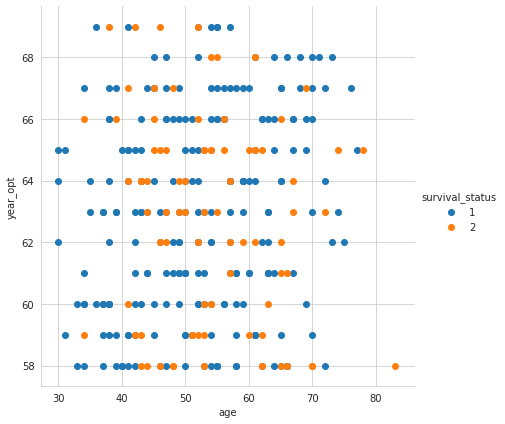

In [29]:
# Plotting scatter plot of survival_status against the operation year using seaborn (sns refers seaborn).
sns.set_style("whitegrid")
sns.FacetGrid(data=dataset, hue='survival_status', size=6) \
    .map(plt.scatter, "age", "year_opt") \
    .add_legend()
plt.show();

#### Note:
* We can not seperate data points just based on age and year_opt feature.
* So now we need other feature, instead of ploting scatter plot of each feature with the other feature one by one, can we plot pair wise scatter plot of all the features?
* How many combinations will be there if we performed this? (4C2)

**Observations**: Its clear from the above image that its not possible for us to decide whether the patient will survive or not from the age and year of operation feature.

## 3.2.2: Pair-plot

* Pair-plot is nothing but pairwise scatter plot, in which we will plot scatter plot of one feature agains the rest of the features in seperate grid as show below.
* We can detect outliers with the help of pair plots.
* It results best optimisation of data sets by analysing given different pairs.
* A scatter plot is more poweful when we incorporate categorical data as an additional dimension.
* Effective for less than 5 or 6 fetaures(columns).
* Since we have less number of features we can analyse them with pair plots.

/home/manu/miniconda3/envs/appliedAI/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


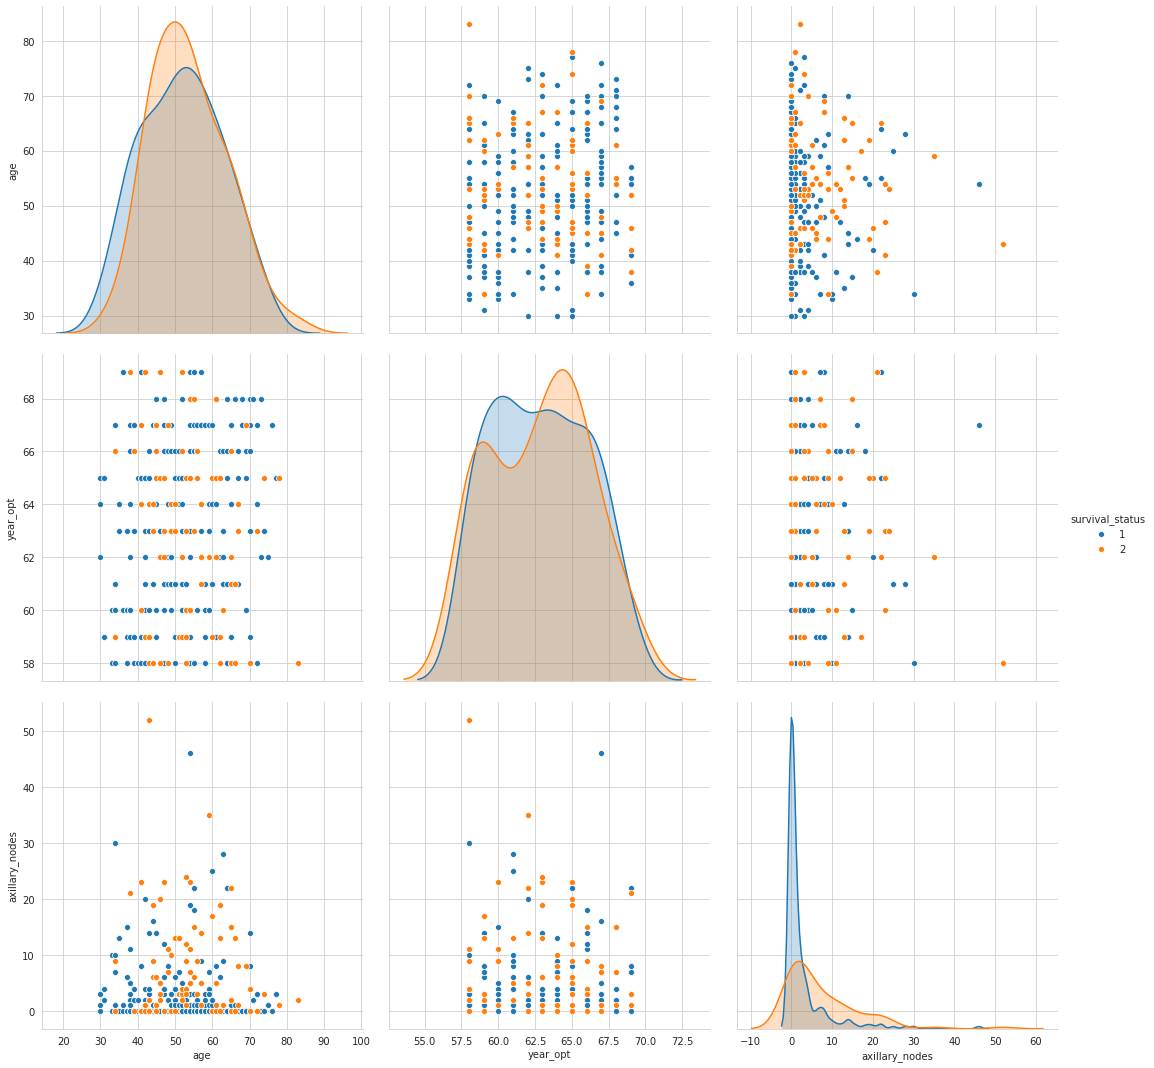

In [30]:
# Closing previously created plt object.
plt.close()

# Setting the style format for graph.
sns.set_style("whitegrid")

# Plotting pair plot.
sns.pairplot(data=dataset, hue='survival_status', vars=["age", "year_opt", "axillary_nodes"], size=5)
plt.show()

#### Note:
* In pair-plot at the diagonal position we have the pdf plot.
* Since we have limited set of features we can plot pair-plot and observe the resutls. But once we have large no. of features we can't use scatter plot or pair plot for decision making.
* We can not also visualize 3-D, 4-D, etc. dimensional patterns using pair-plot.

**Observations**: No plots from the above pair plot could be useful to draw a seperating line, hence we can't draw any conclusions from it.

# 3.3: Univariate Analysis

So in univariate we will try to understand each feature standalone through different plotting methods such as by plotting distribution plots, pdf, cdf, etc. and lets see whether we can draw any conclusions from it or not.

## 3.3.1: 1-D Scatter plot

In 1-D scatter plot we will try to plot the features induvidually alogn with the color coding on the target variable.

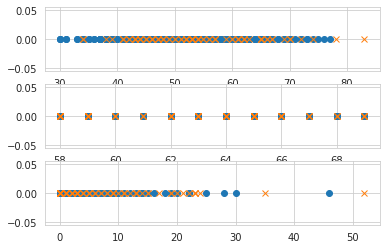

In [31]:
# Creating seperate dataframe of survived and non survived people.
Survived = dataset.loc[dataset["survival_status"] == 1];
Non_Survived = dataset.loc[dataset["survival_status"] == 2];

# Instantiating figure object.
fig=plt.figure(1)

# Creating subplot for age feature.
ax=fig.add_subplot(311)
plt.plot(Survived["age"], np.zeros_like(Survived['age']), 'o')
plt.plot(Non_Survived["age"], np.zeros_like(Non_Survived['age']), 'x')


# Creating subplot for operation year feature.
ax=fig.add_subplot(312)
plt.plot(Survived["year_opt"], np.zeros_like(Survived['year_opt']), 'o')
plt.plot(Non_Survived["year_opt"], np.zeros_like(Non_Survived['year_opt']), 'x')

# Creating subplot for axilliary nodes feature.
ax=fig.add_subplot(313)
plt.plot(Survived["axillary_nodes"], np.zeros_like(Survived['axillary_nodes']), 'o')
plt.plot(Non_Survived["axillary_nodes"], np.zeros_like(Non_Survived['axillary_nodes']), 'x')

plt.show()

#### Note:
* In 1-D scatter plot data points are heavily overlap.
* Is there any better visualization for 1-D scatter plot?

**Observation(s):** Still we can not draw any conclusion out of it.

## 3.3.2: Histogram Plot

In histogram plot we will plot the graph based upon the prob (count/ sum(count)) by creating the multiple bins and we are also plotting the pdf as well. Pdf's are being generated using KDE method.

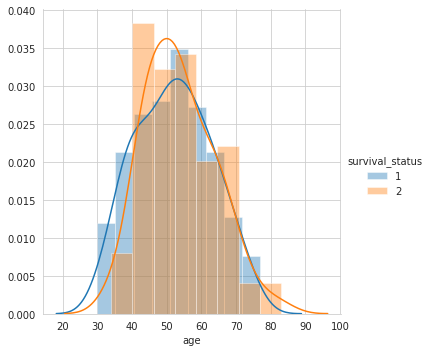

In [32]:
sns.FacetGrid(data=dataset, hue="survival_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

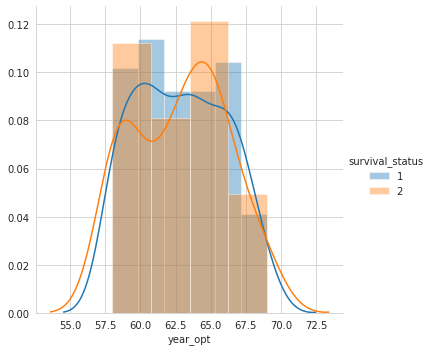

In [33]:
sns.FacetGrid(data=dataset, hue="survival_status", size=5) \
   .map(sns.distplot, "year_opt") \
   .add_legend();
plt.show();

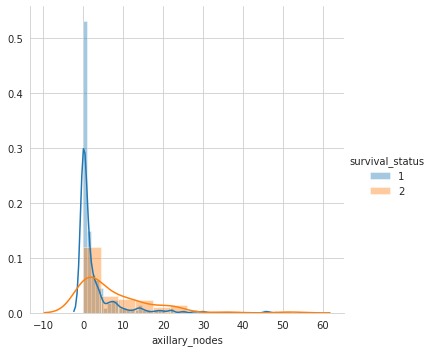

In [34]:
sns.FacetGrid(data=dataset, hue="survival_status", size=5) \
   .map(sns.distplot, "axillary_nodes") \
   .add_legend();
plt.show();

#### Observation(s):
* From above pdf plots we found overlaping of target variable w.r.t. to independent variable.
* In axillary nodes feature we found less overlaping as compared to rest of the features.
* We can say that almost all the people with zero axillary node survived.
* We found that in age feature the distribution is almost similar. So its not giving a good indicator to judge whether patient survived or not.

## 3.3.3: CDF Plot

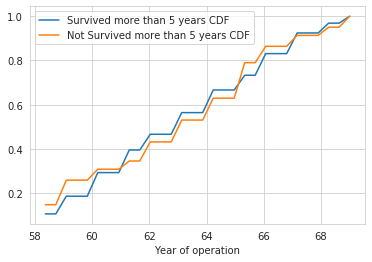

In [35]:
# Get the counts and bin edges of axillary nodes whose survival status is 1
counts, bin_edges = np.histogram(Survived["year_opt"], bins=30, density=True)

# Get the counts and bin edges of axillary nodes whose survival status is 2
counts_Non, bin_edges_Non = np.histogram(Non_Survived["year_opt"], bins=30, density=True)

# PDF and CDF of survived
pdf_axillary_survived = counts/sum(counts)
cdf_axillary_survived = np.cumsum(pdf_axillary_survived)

# PDF and CDF of non survived
pdf_axillary_Non_survived = counts_Non/sum(counts_Non)
cdf_axillary_Non_survived = np.cumsum(pdf_axillary_Non_survived)

# Plot survived and non survived PDF, CDF in a single plot
plt.plot(bin_edges[1:], cdf_axillary_survived)
plt.plot(bin_edges_Non[1:], cdf_axillary_Non_survived)
plt.xlabel("Year of operation")

plt.legend(["Survived more than 5 years CDF", "Not Survived more than 5 years CDF" ])
plt.show()

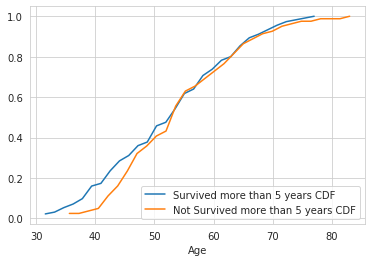

In [36]:
# Get the counts and bin edges of axillary nodes whose survival status is 1
counts, bin_edges = np.histogram(Survived["age"], bins=30, density=True)

# Get the counts and bin edges of axillary nodes whose survival status is 2
counts_Non, bin_edges_Non = np.histogram(Non_Survived["age"], bins=30, density=True)

# PDF and CDF of survived
pdf_axillary_survived = counts/sum(counts)
cdf_axillary_survived = np.cumsum(pdf_axillary_survived)

# PDF and CDF of non survived
pdf_axillary_Non_survived = counts_Non/sum(counts_Non)
cdf_axillary_Non_survived = np.cumsum(pdf_axillary_Non_survived)

# Plot survived and non survived PDF, CDF in a single plot
plt.plot(bin_edges[1:], cdf_axillary_survived)
plt.plot(bin_edges_Non[1:], cdf_axillary_Non_survived)
plt.xlabel("Age")

plt.legend(["Survived more than 5 years CDF", "Not Survived more than 5 years CDF" ])
plt.show()

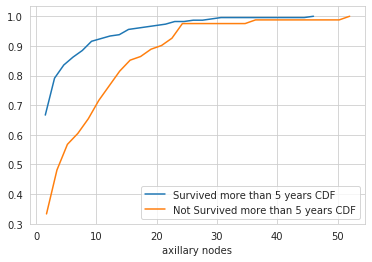

In [37]:
# Get the counts and bin edges of axillary nodes whose survival status is 1
counts, bin_edges = np.histogram(Survived["axillary_nodes"], bins=30, density=True)

# Get the counts and bin edges of axillary nodes whose survival status is 2
counts_Non, bin_edges_Non = np.histogram(Non_Survived["axillary_nodes"], bins=30, density=True)

# PDF and CDF of survived
pdf_axillary_survived = counts/sum(counts)
cdf_axillary_survived = np.cumsum(pdf_axillary_survived)

# PDF and CDF of non survived
pdf_axillary_Non_survived = counts_Non/sum(counts_Non)
cdf_axillary_Non_survived = np.cumsum(pdf_axillary_Non_survived)

# Plot survived and non survived PDF, CDF in a single plot
plt.plot(bin_edges[1:], cdf_axillary_survived)
plt.plot(bin_edges_Non[1:], cdf_axillary_Non_survived)
plt.xlabel("axillary nodes")

plt.legend(["Survived more than 5 years CDF", "Not Survived more than 5 years CDF" ])
plt.show()

#### Observations:
* More that 65% of the patients survived with zero axillary nodes.
* Deciding feature in our dataset is axillary node and we have seen in the above bivariate and multivariate analysis we failed to extract any information from combination of features as per the cdf plot.

## 3.3.4: Box-plot

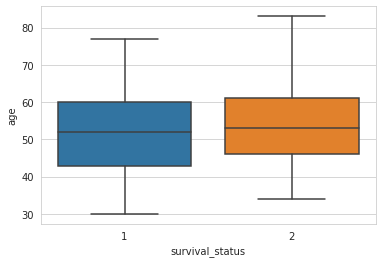

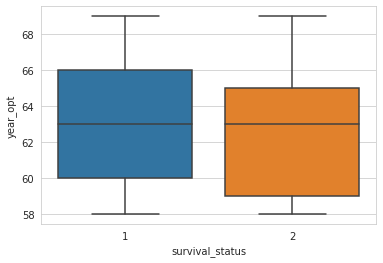

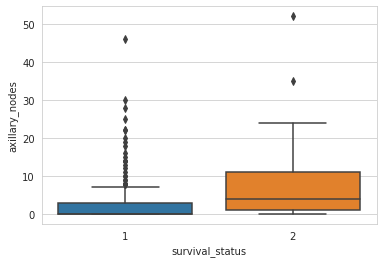

In [38]:
# Box plot as per age of patients.
plt.figure()
sns.boxplot(x='survival_status', y='age', data=dataset)

# Box plot as per age of patients.
plt.figure()
sns.boxplot(x='survival_status', y='year_opt', data=dataset)

# Box plot as per age of patients.
plt.figure()
sns.boxplot(x='survival_status', y='axillary_nodes', data=dataset)

plt.show()
plt.close()

#### Observation:
* People having less number of axillary zero have survived more.
* People who have gone through operation after 1965 have survived.

### 3.3.5: Violin plot

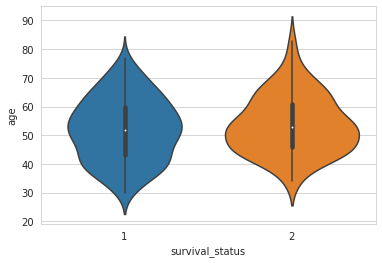

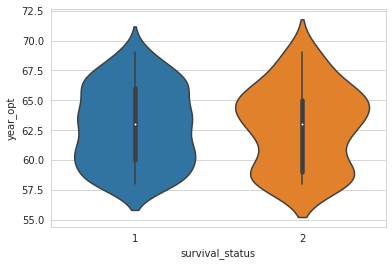

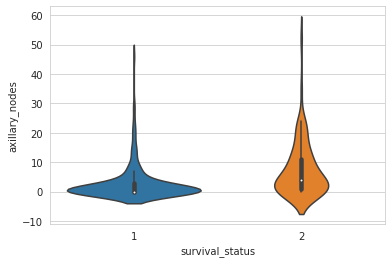

In [39]:
# Box plot as per age of patients.
plt.figure()
sns.violinplot(x='survival_status', y='age', data=dataset)

# Box plot as per age of patients.
plt.figure()
sns.violinplot(x='survival_status', y='year_opt', data=dataset)

# Box plot as per age of patients.
plt.figure()
sns.violinplot(x='survival_status', y='axillary_nodes', data=dataset)

plt.show()
plt.close()

#### Observations: 
* 50th percentile of the axillary node is almost at zero. So our observation of survival increase if patients have zero axillary node.

# 3.4: Multivariate Analysis

## 3.4.1: 3-D Scatter plots

In multivariate analysis we try to find the the patterns using more than two features. So in our haberman dataset case now we will take all the independent features age, year of peration and axilliary node togher to plot a 3-D scatter plot.

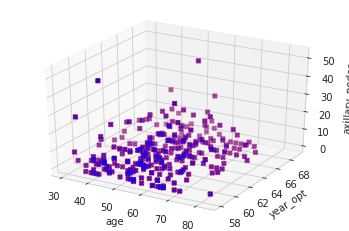

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

survived_dataset = dataset[dataset["survival_status"] == 1]

xs=dataset["age"]
ys=dataset["year_opt"]
zs=dataset["axillary_nodes"]

not_survived_dataset = dataset[dataset["survival_status"] == 2]

xns=dataset["age"]
yns=dataset["year_opt"]
zns=dataset["axillary_nodes"]

ax.scatter(xs,ys,zs, c='r', marker='o');
ax.scatter(xns,yns,zns,  c='b', marker='x')

ax.set_xlabel('age')
ax.set_ylabel('year_opt')
ax.set_zlabel('axillary_nodes')

plt.show()
plt.close()

**Observation(s):** Still we can not draw any conclusion out of above 3-D scatter plot.

## 3.4.2: Probability density plot, contour plots, etc.

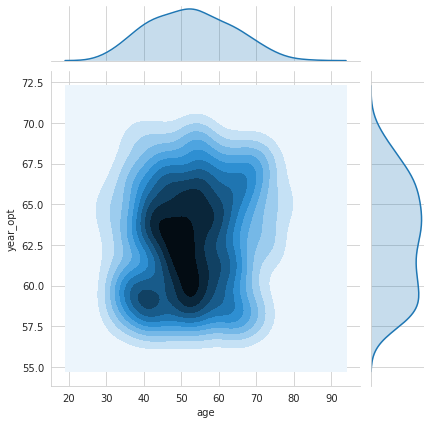

In [41]:
sns.jointplot(x='age', kind='kde', y='year_opt', data=dataset)
plt.show()

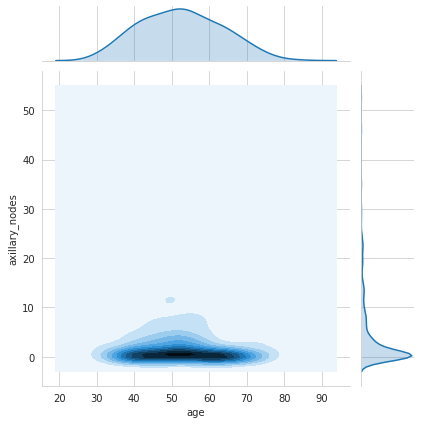

In [42]:
sns.jointplot(x='age', kind='kde', y='axillary_nodes', data=dataset)
plt.show()

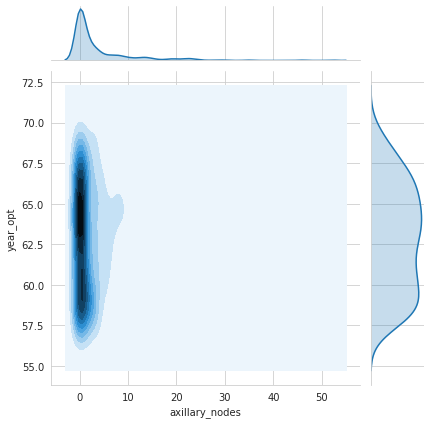

In [43]:
sns.jointplot(x='axillary_nodes', kind='kde', y='year_opt', data=dataset)
plt.show()

### Final Conclusion:
* People having less axillary nodes i.e. close to zero have higher survival rate.
* Its hard to draw a line which seperate the survived and non-survived patients.